In [1]:
from scrna.datasets import *
from scrna.prc import *
from scrna.rmt import BiwhitenedCovarianceEstimator
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import seaborn as sns

# Small number of genes

In [2]:
methods = {
    'bipca': BiPCAScaler(with_mean=True),
    'gene z-score + cell z-score': RightLeftWhiteningScaler(with_mean=True),
    'gene z-score + cell L2 norm': RightWhiteningLeftNormalizerScaler(with_mean=True),
    'gene z-score': WhiteningScaler(with_mean=True),
    'biwhitening': BiwhiteningScaler(with_mean=True),
}

scores = {}
factors = {}
rng = np.random.default_rng(123)
ngenes = 2500

# In the scLENS paper the tot counts in the normalization is set to 1 instead of 10000
for dataset, info in DATASETS.items():
        
    print('processing dataset', dataset)
    _, _small, _, _ = get_subsampled_datasets(dataset, rng=rng)

    pr_pipeline = get_preprocessing_pipeline()
    pr_pipeline.set_params(highly_variable__num = ngenes)
    _small = pr_pipeline.fit_transform(_small)

    _scores = {}
    _factors = {}

    for (name, scaling) in methods.items():

        small = scaling.fit_transform(_small.copy())
        cov_est = BiwhitenedCovarianceEstimator().fit(small)
        
        _score = cov_est.score(small)
        print(_score, cov_est.n_comps_)

        _scores[name] = [_score[0], _score[1]]

        if (name == 'biwhitening'
            or name == 'bipca'):
            _factors[name] = [small.adata.obs['D1'].to_numpy(), small.adata.var['D2'].to_numpy()]

    
    print(info['name']+'\n('+dataset+')')
    factors[info['name']+'\n('+dataset+')'] = _factors
    scores[info['name']+'\n('+dataset+')'] = _scores



processing dataset 10xchromiumv1
checking 68k_pbmc_celltypes.obs.txt
checking 68k_pbmc.matrix.mtx
reading file /mnt/home/vchardes/ceph/datasets/10XChromiumV1_Zheng17_68k_PBMC/68k_pbmc.matrix.mtx
found maching gene/features names
found matching barcodes
loading annotations file 68k_pbmc_celltypes.obs.txt
no separator identified in .txt file, falling back on default separator
no obs labels found in annotation file
obs is same shape as data, matching index to index
checking raw
checking 68k_pbmc.genes.tsv
checking 68k_pbmc.barcodes.tsv
passed cell quality filter, 68579 before, 68528 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  49.2s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.2s
minimum number of cells 279.99999999999994
passed gene quality filter, 32738 before, 7416 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=   2.9s
passed resampling, size 3000
[Pipeline] .......... (step 1 o

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.5s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.3s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.1s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 6.577230761822432e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=1.2418161351741848, c=0.17037696543382688, KS=0.006399999999999961
    Approximating the mean of all submatrices
    Approximation ratio is 6.577230761817524e-08 with 65 coefficients
    b=1.2418141730920993, c=0.17037669623649282
  Calculated variance fit over entire input in 22.50 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 30 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.11 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.83 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 16
Calculated BiPCA fit in 23.50 seconds.
Calculating plotting spectra...


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.008975595338275588, pvalue=0.9867849334582206, statistic_location=0.020809002, statistic_sign=1) 10


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.009272152461685092, pvalue=0.9812968557313114, statistic_location=0.018986678, statistic_sign=1) 10


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.03384501273181073, pvalue=0.006359553159263789, statistic_location=3.2313766, statistic_sign=-1) 69
iter 0 lim1 427656.84058622987 lim2 120311.481002617
iter 5 lim1 12.967487768939115 lim2 0.040919992003699335
iter 10 lim1 0.41752843605054624 lim2 0.0003153148519838833
iter 15 lim1 0.01863382252663337 lim2 1.8951209315165585e-05
iter 20 lim1 0.0009729758094352281 lim2 1.2742752240058053e-06
iter 25 lim1 5.10691878883307e-05 lim2 7.340974406133682e-08
iter 30 lim1 2.68728663477269e-06 lim2 4.068393177902863e-09
stopping criterion reached iter 33 lim1 8.277779628418358e-07 lim2 1.263949833685274e-09
KstestResult(statistic=0.00991518363001731, pvalue=0.9645560866048644, statistic_location=2.4755969723474474, statistic_sign=1) 11
Zheng2017
(10xchromiumv1)
processing dataset multiome
checking GSE194122_openproblems_neurips2021_multiome_BMMC_ATAC.h5ad
checking GSE194122_openproblems_neurips2021_multiome_BMMC_merged.h5ad
checking GSE194122_openproblems_neurips2021_mul

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.2s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.6s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 2.5214312223800372e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.5654068819924403, c=3.594387737591763, KS=0.013548978431493941
    Approximating the mean of all submatrices
    Approximation ratio is 2.5214312223800365e-08 with 65 coefficients
    b=0.5654043354921732, c=3.5943715490563024
  Calculated variance fit over entire input in 23.17 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 50 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.13 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.81 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 33
Calculated BiPCA fit in 24.18 seconds.
Calculating plotting spectra...
  

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.025314513285309426, pvalue=0.07991370871602088, statistic_location=2.9853525, statistic_sign=-1) 47


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.025113827515558906, pvalue=0.08396502404944095, statistic_location=3.0903513, statistic_sign=-1) 47


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.09202599179837401, pvalue=7.103343434366769e-19, statistic_location=3.2455146, statistic_sign=-1) 212
iter 0 lim1 775894.8905374643 lim2 367371.2971020447
iter 5 lim1 9.902714257417575 lim2 0.32467192654040833
iter 10 lim1 0.027290638501496378 lim2 0.0005665057883790237
iter 15 lim1 0.0015195358874309228 lim2 4.5396792601293257e-05
iter 20 lim1 0.0001729355125429377 lim2 5.076513823976114e-06
iter 25 lim1 1.8830192314633898e-05 lim2 5.515325012250827e-07
iter 30 lim1 2.014677776496221e-06 lim2 5.898900146128483e-08
stopping criterion reached iter 33 lim1 8.222074119323963e-07 lim2 2.4072837279121018e-08
KstestResult(statistic=0.01319999999999999, pvalue=0.7711368160594076, statistic_location=3.6687627509997522, statistic_sign=-1) 32
Luecken2021
(multiome)
processing dataset indrops
checking GSE102827_merged_all_raw_celltypes.obs.csv
checking raw
checking GSE102827_TMM_norm_cpm_bulk_extra.csv
checking GSE102827_merged_all_raw.dge.csv
reading file /mnt/home/vchar

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.6s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 5.805974948976624e-09 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.6774257581239576, c=2.551910686847222, KS=0.013194560524393939
    Approximating the mean of all submatrices
    Approximation ratio is 5.805974948991306e-09 with 65 coefficients
    b=0.6774294125686988, c=2.551924453398718
  Calculated variance fit over entire input in 23.61 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 40 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.13 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.82 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 32
Calculated BiPCA fit in 24.63 seconds.
Calculating plotting spectra...
  Ca

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.03554343793625192, pvalue=0.0035318902486566714, statistic_location=3.037271, statistic_sign=-1) 65


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.0354814569034253, pvalue=0.003601565339850802, statistic_location=2.9066334, statistic_sign=-1) 63


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.09442651814472802, pvalue=7.501557902633558e-20, statistic_location=3.1058488, statistic_sign=-1) 210
iter 0 lim1 987593.2866202639 lim2 417828.4872100047
iter 5 lim1 4.44065187696301 lim2 0.26691308702683747
iter 10 lim1 0.02017217473042221 lim2 0.002186795366608596
iter 15 lim1 0.0027169223793378494 lim2 0.00012523694057375856
iter 20 lim1 0.00028267141371574045 lim2 9.591372556183586e-06
iter 25 lim1 2.6488842248539868e-05 lim2 8.780411302478086e-07
iter 30 lim1 2.359096603732347e-06 lim2 7.729018958180234e-08
stopping criterion reached iter 33 lim1 8.891106861863562e-07 lim2 2.904113483026549e-08
KstestResult(statistic=0.013157081699595397, pvalue=0.7745425817336059, statistic_location=3.6063084112996475, statistic_sign=-1) 32
Hrvatin2016
(indrops)
processing dataset smart-seq3xpress
checking E-MTAB-11452.sdrf.txt
checking PBMCs_allruns_umicounts_intronexon.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Smart-Seq3xpress_E-MTAB-11452_10.1038_s41587-02

/mnt/home/vchardes/scrna/scrna/data.py:523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][isin] = annots.loc[data.adata.var_names[isin]]['gene_name']
/mnt/home/vchardes/scrna/scrna/data.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][nans] = data.adata.var_names[nans]


no cell barcodes file found
checking PBMCs_allruns_umicounts_intronexon_barcode_annotation.txt
checking PBMCs_allruns_readcounts_intronexon.txt
passed cell quality filter, 43671 before, 40373 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  18.7s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.3s
minimum number of cells 279.99999999999994
passed gene quality filter, 55560 before, 17210 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=  14.7s
passed resampling, size 3000
[Pipeline] .......... (step 1 of 9) Processing to_layer, total=   0.0s
minimum number of cells 20.999999999999996
passed gene quality filter, 17210 before, 16873 remaining
[Pipeline] ........ (step 2 of 9) Processing qc_genes_1, total=   3.3s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 3 of 9) Processing qc_cells_1, total=   0.2s
scanpy norm_factor are count per cells
[Pipeline] .....

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.8s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.8s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 5.699814851333443e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=1.4719236602882484, c=1.4402609405352493, KS=0.010799512544702572
    Approximating the mean of all submatrices
    Approximation ratio is 5.699814851333443e-08 with 65 coefficients
    b=1.4719385099555473, c=1.440275470769643
  Calculated variance fit over entire input in 23.31 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 50 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.12 seconds.
  Calculating dense Biscaling transform...
  Calculated dense Biscaling transform in 0.01 seconds.
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.83 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 26
Calculated BiPCA f

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.02492269363345556, pvalue=0.08819814906130563, statistic_location=3.0534832, statistic_sign=-1) 44


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.029048074099113363, pvalue=0.028851459796492618, statistic_location=2.7012339, statistic_sign=-1) 48


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.1562718259898117, pvalue=8.696542412319034e-54, statistic_location=3.2854877, statistic_sign=-1) 368
iter 0 lim1 1055789.2003602001 lim2 1144773.6207866368
iter 5 lim1 23.50123232290668 lim2 0.24878138460590704
iter 10 lim1 0.431537586179078 lim2 0.0012547809040668323
iter 15 lim1 0.004530960967276898 lim2 0.0001303644928525305
iter 20 lim1 0.0005743129654269818 lim2 1.5934716378840363e-05
iter 25 lim1 7.224095452706969e-05 lim2 1.9950605534280186e-06
iter 30 lim1 9.081393882781619e-06 lim2 2.506505309973761e-07
iter 35 lim1 1.141644862867608e-06 lim2 3.150766936244054e-08
stopping criterion reached iter 37 lim1 7.540643216508158e-07 lim2 2.0810972500839853e-08
KstestResult(statistic=0.01520351771435402, pvalue=0.604525664560114, statistic_location=2.499248215870926, statistic_sign=1) 18
Jensen2022
(smart-seq3xpress)
processing dataset drop-seq
checking GSE63472_P14Retina_merged.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Drop-Seq_GSE63472_10.1016_j.c

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.1s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.6s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.1s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 2.9950382331137746e-07 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.9647795221306977, c=3.5402368209308928, KS=0.006800000000000028
    Approximating the mean of all submatrices
    Approximation ratio is 2.9950382331137746e-07 with 65 coefficients
    b=0.9647757430625364, c=3.5402229537249985
  Calculated variance fit over entire input in 22.98 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 40 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.12 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.85 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 17
Calculated BiPCA fit in 24.00 seconds.
Calculating plotting spectra...
 

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.018612025659836433, pvalue=0.34786573853155467, statistic_location=0.033139687, statistic_sign=1) 23


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.018986255351713187, pvalue=0.32426166264135026, statistic_location=0.033140827, statistic_sign=1) 23


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.11932943310051047, pvalue=1.7774279019702866e-31, statistic_location=3.341454, statistic_sign=-1) 286
iter 0 lim1 871964.5532752085 lim2 473657.04711869627
iter 5 lim1 10.978499682095471 lim2 0.27761644862787294
iter 10 lim1 0.1620780240418056 lim2 0.0038946294618618094
iter 15 lim1 0.0021012840484837536 lim2 9.627218045671349e-05
iter 20 lim1 8.999375066287563e-05 lim2 4.893961539353953e-06
iter 25 lim1 4.813707681239343e-06 lim2 2.3027766493655122e-07
stopping criterion reached iter 29 lim1 8.063153136284029e-07 lim2 3.6567670669285235e-08
KstestResult(statistic=0.006789566949031767, pvalue=0.9997991363997717, statistic_location=3.6567635233345883, statistic_sign=-1) 16
Macosko2015
(drop-seq)
processing dataset cite-seq
checking GSM3681518_MNC_RNA.obs.csv
checking GSM3681518_MNC_RNA.dge.tsv
reading file /mnt/home/vchardes/ceph/datasets/CITE-Seq_GSE128639_10.1016_j.cell.2019.05.031/GSM3681518_MNC_RNA.dge.tsv
no gene/features names file found, looking for ensem

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.1s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.7s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.3s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.1s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 7.528938981506804e-09 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.8933015811722188, c=1.8983004794960898, KS=0.007600000000000051
    Approximating the mean of all submatrices
    Approximation ratio is 7.528938981517633e-09 with 65 coefficients
    b=0.893300348512757, c=1.8982978600469573
  Calculated variance fit over entire input in 24.83 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 130 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.17 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.79 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 19
Calculated BiPCA fit in 25.84 seconds.
Calculating plotting spectra...
  

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

KstestResult(statistic=0.014793864835586645, pvalue=0.6392144383158556, statistic_location=3.0293698, statistic_sign=-1) 25


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.015142970477081796, pvalue=0.6095995454575257, statistic_location=3.001507, statistic_sign=-1) 25


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


KstestResult(statistic=0.06241775496362523, pvalue=6.5515764017712744e-09, statistic_location=3.3969567, statistic_sign=-1) 145
iter 0 lim1 909820.8861596051 lim2 206035.7275749756
iter 5 lim1 33.960311438973406 lim2 0.49141984729912513
iter 10 lim1 3.150039770412688 lim2 0.0031452440182662134
iter 15 lim1 0.14144689413069078 lim2 0.0002481325128316225
iter 20 lim1 0.006731198935233218 lim2 3.8996857190554124e-05
iter 25 lim1 0.00468035372162201 lim2 1.9470087529116498e-05
iter 30 lim1 0.006577245339479787 lim2 1.2303822839898615e-05
iter 35 lim1 0.0072021621714262185 lim2 8.442087341187232e-06
iter 40 lim1 0.005519661721054225 lim2 5.195948860059474e-06
iter 45 lim1 0.003165185334586096 lim2 2.7101500343906793e-06
iter 50 lim1 0.0015272483194410658 lim2 1.2564733655739957e-06
iter 55 lim1 0.0006766780686858764 lim2 5.474930162563396e-07
iter 60 lim1 0.0002885651253428101 lim2 2.3186000408514928e-07
iter 65 lim1 0.00012105499461967373 lim2 9.698692182702473e-08
iter 70 lim1 5.043434434

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.3s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.1s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.9s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.6s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 6.216859292114946e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.6636566916512199, c=1.5665896121179737, KS=0.02119736634635816
    Approximating the mean of all submatrices
    Approximation ratio is 6.216859292110588e-08 with 65 coefficients
    b=0.6636562595621184, c=1.5665885921534441
  Calculated variance fit over entire input in 22.37 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 40 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.11 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=2500 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=2500 dense exact singular value decomposition using __compute_torch_svd. in 0.80 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 52
Calculated BiPCA fit in 23.34 seconds.
Calculating plotting spectra...
  C

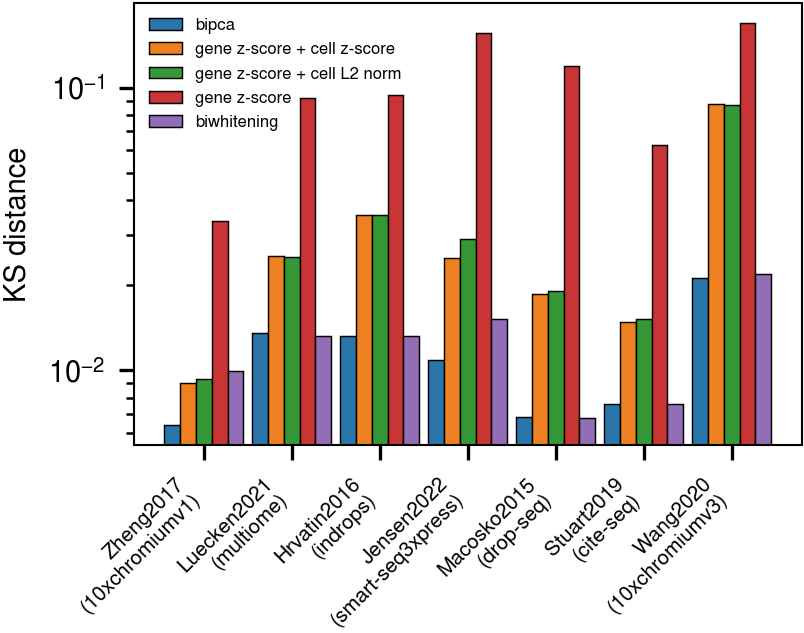

In [3]:
import json
json.dump(scores, open('figures/scalings_counts_%d.json' % ngenes, 'w'))
#scores = json.load(open('figures/scalings_counts.json'))
# Assuming scores is defined
data = scores
categories = list(data.keys())
methods = list(next(iter(data.values())).keys())

values = {method: [data[cat][method][0] for cat in categories] for method in methods}

x = np.arange(len(categories))  # label locations
width = 0.9 / len(methods)      # adaptive width based on number of methods

figsize = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(figsize=[1.2*figsize[0], 0.8*figsize[1]])

cmap = iter(sns.color_palette('tab10', desat=0.85))

for i, method in enumerate(methods):
    offset = (i - (len(methods) - 1) / 2) * width
    bar_positions = x + offset
    ax.bar(bar_positions, values[method], width=width, label=method,
           color=next(cmap), edgecolor='black', linewidth=0.35)

ax.set_ylabel('KS distance')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize = 5)
ax.tick_params(axis='y')
ax.set_yscale('log')

ax.legend(fontsize=4, loc='upper left', frameon=False)

fig.savefig('figures/scalings_counts_%d.pdf' % ngenes, dpi=300)


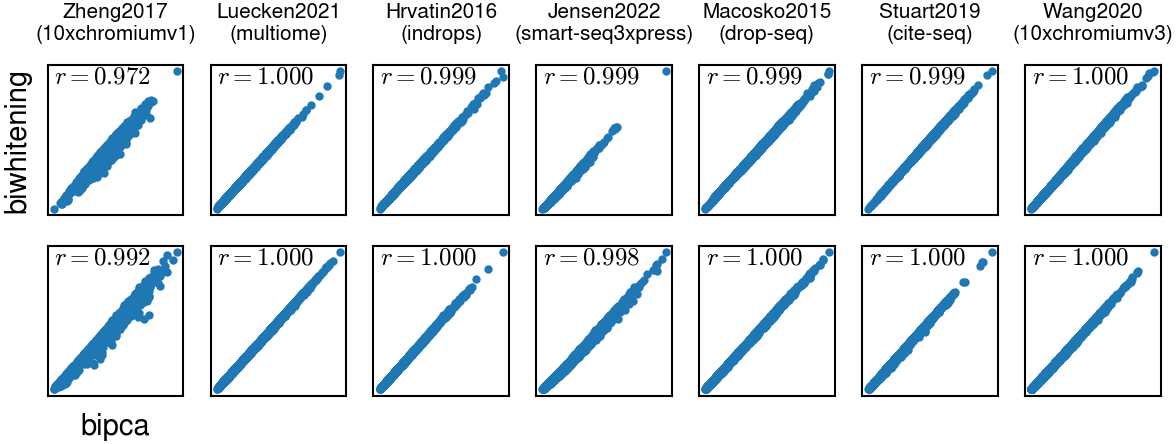

In [4]:
size = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(nrows=2, ncols=len(factors), figsize=(2.0*size[0], 0.6*size[1]))

from scipy.stats import pearsonr

for i, (name, data) in enumerate(factors.items()):

    ax[0,i].scatter(data['bipca'][0], data['biwhitening'][0], s=1**2)
    ax[0,i].collections[0].set_rasterized(True)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    res = pearsonr(data['bipca'][0], data['biwhitening'][0])
    ax[0,i].annotate(r'$r = %.3f$' % res.statistic, (0.05, 0.88), xycoords='axes fraction',fontsize=6)
    ax[0,i].set_title(name, fontsize=5)
    
    
    ax[1,i].scatter(data['bipca'][1], data['biwhitening'][1],s=1**2)
    ax[1,i].collections[0].set_rasterized(True)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    res = pearsonr(data['bipca'][1], data['biwhitening'][1])
    ax[1,i].annotate(r'$r = %.3f$' % res.statistic, (0.05, 0.88), xycoords='axes fraction', fontsize=6)
    
    
ax[0,0].set_ylabel('biwhitening')
ax[1,0].set_xlabel('bipca')

fig.savefig('figures/scalings_pearson_%d.pdf' % ngenes, dpi=300)

# Large number of genes

In [5]:
methods = {
    'bipca': BiPCAScaler(with_mean=True),
    'gene z-score + cell z-score': RightLeftWhiteningScaler(with_mean=True),
    'gene z-score + cell L2 norm': RightWhiteningLeftNormalizerScaler(with_mean=True),
    'gene z-score': WhiteningScaler(with_mean=True),
    'biwhitening': BiwhiteningScaler(with_mean=True),
}

scores = {}
factors = {}
rng = np.random.default_rng(123)
ngenes = 10000
# In the scLENS paper the tot counts in the normalization is set to 1 instead of 10000
for dataset, info in DATASETS.items():
        
    print('processing dataset', dataset)
    _, _small, _, _ = get_subsampled_datasets(dataset, rng=rng)

    pr_pipeline = get_preprocessing_pipeline()
    pr_pipeline.set_params(highly_variable__num = ngenes)
    _small = pr_pipeline.fit_transform(_small)

    _scores = {}
    _factors = {}

    for (name, scaling) in methods.items():

        small = scaling.fit_transform(_small.copy())
        cov_est = BiwhitenedCovarianceEstimator().fit(small)

        _score = cov_est.score(small)
        _scores[name] = [_score[0], _score[1]]

        if (name == 'biwhitening'
            or name == 'bipca'):
            _factors[name] = [small.adata.obs['D1'].to_numpy(), small.adata.var['D2'].to_numpy()]

    
    print(info['name']+'\n('+dataset+')')
    factors[info['name']+'\n('+dataset+')'] = _factors
    scores[info['name']+'\n('+dataset+')'] = _scores



processing dataset 10xchromiumv1
checking 68k_pbmc_celltypes.obs.txt
checking 68k_pbmc.matrix.mtx
reading file /mnt/home/vchardes/ceph/datasets/10XChromiumV1_Zheng17_68k_PBMC/68k_pbmc.matrix.mtx
found maching gene/features names
found matching barcodes
loading annotations file 68k_pbmc_celltypes.obs.txt
no separator identified in .txt file, falling back on default separator
no obs labels found in annotation file
obs is same shape as data, matching index to index
checking raw
checking 68k_pbmc.genes.tsv
checking 68k_pbmc.barcodes.tsv
passed cell quality filter, 68579 before, 68528 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  50.4s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.2s
minimum number of cells 279.99999999999994
passed gene quality filter, 32738 before, 7416 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=   3.1s
passed resampling, size 3000
[Pipeline] .......... (step 1 o

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   0.8s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   0.7s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.1s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 5.412976433605923e-07 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.0, c=15.996212266639828, KS=0.003666985117411592
    Approximating the mean of all submatrices
    Approximation ratio is 5.412976433605922e-07 with 65 coefficients
    b=0.0, c=15.996212266639828
  Calculated variance fit over entire input in 35.73 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 20 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.14 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.73 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 11
Calculated BiPCA fit in 36.71 seconds.
Calculating plotting spectra...
  Calculating spectrum of biwhit

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 2572091.7313527022 lim2 731559.4383670909
iter 5 lim1 18.325462618138552 lim2 0.6081596401910623
iter 10 lim1 1.0495230708788403 lim2 0.0010736219468625574
iter 15 lim1 0.09510882385537389 lim2 5.5324207499651834e-05
iter 20 lim1 0.008649169815773794 lim2 3.689005523499489e-06
iter 25 lim1 0.0007876359195064797 lim2 2.679936816907258e-07
iter 30 lim1 7.17953157876039e-05 lim2 2.146484656684322e-08
iter 35 lim1 6.548705004494337e-06 lim2 1.7360881621186763e-09
stopping criterion reached iter 40 lim1 9.646095751048023e-07 lim2 2.336393301050066e-10
Zheng2017
(10xchromiumv1)
processing dataset multiome
checking GSE194122_openproblems_neurips2021_multiome_BMMC_ATAC.h5ad
checking GSE194122_openproblems_neurips2021_multiome_BMMC_merged.h5ad
checking GSE194122_openproblems_neurips2021_multiome_BMMC_RNA.matrix.h5ad
reading file /mnt/home/vchardes/ceph/datasets/Multiome_GSE194122_luecken_neurips_2021/GSE194122_openproblems_neurips2021_multiome_BMMC_RNA.matrix.h5ad
transposing the da

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.2s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.7s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.4s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 1.9022598599031102e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.6388742762131341, c=3.0517163503841513, KS=0.013111262407516255
    Approximating the mean of all submatrices
    Approximation ratio is 1.9022598599005403e-08 with 65 coefficients
    b=0.63887542832665, c=3.051721853694998
  Calculated variance fit over entire input in 38.70 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 20 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.16 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.50 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 38
Calculated BiPCA fit in 39.52 seconds.
Calculating plotting spectra...
  Ca

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 9623655.43711159 lim2 2915900.0609274213
iter 5 lim1 34.87715439135272 lim2 1.7876004043169258
iter 10 lim1 0.6016114498038896 lim2 0.0024275070607262528
iter 15 lim1 0.006461218676384162 lim2 2.654172884253292e-05
iter 20 lim1 6.858040249113628e-05 lim2 2.498511841864115e-07
iter 25 lim1 9.806393416189607e-07 lim2 3.6101501788010637e-09
stopping criterion reached iter 26 lim1 9.806393416189607e-07 lim2 3.6101501788010637e-09
Luecken2021
(multiome)
processing dataset indrops
checking GSE102827_merged_all_raw_celltypes.obs.csv
checking raw
checking GSE102827_TMM_norm_cpm_bulk_extra.csv
checking GSE102827_merged_all_raw.dge.csv
reading file /mnt/home/vchardes/ceph/datasets/inDrops_GSE102827_10.1038_s41593-018-0112-6/GSE102827_merged_all_raw.dge.csv
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
loading annotations file GSE102827_merged_all_raw_celltypes.obs.csv
obs labels found in annotation file
passed cell quality filter, 6553

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.6s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.5s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 2.1372524904507348e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.7282710342500235, c=2.5750091978759113, KS=0.014130677831684202
    Approximating the mean of all submatrices
    Approximation ratio is 2.13725249044818e-08 with 65 coefficients
    b=0.7282719850815351, c=2.5750125598109332
  Calculated variance fit over entire input in 38.77 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 20 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.16 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.49 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 40
Calculated BiPCA fit in 39.57 seconds.
Calculating plotting spectra...
  C

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 11986570.440653564 lim2 2198675.3101689178
iter 5 lim1 21.342663918041062 lim2 1.386297207749221
iter 10 lim1 0.46504144102242373 lim2 0.0015523830779546888
iter 15 lim1 0.009793527083393982 lim2 2.836590503285663e-05
iter 20 lim1 0.00027558704306029913 lim2 6.105493566277431e-07
iter 25 lim1 8.32317087173795e-06 lim2 1.2183490882833325e-08
stopping criterion reached iter 30 lim1 5.073089285323462e-07 lim2 5.206388653533622e-10
Hrvatin2016
(indrops)
processing dataset smart-seq3xpress
checking E-MTAB-11452.sdrf.txt
checking PBMCs_allruns_umicounts_intronexon.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Smart-Seq3xpress_E-MTAB-11452_10.1038_s41587-022-01311-4/PBMCs_allruns_umicounts_intronexon.dge.txt
no gene/features names file found, looking for ensembl annotations


/mnt/home/vchardes/scrna/scrna/data.py:523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][isin] = annots.loc[data.adata.var_names[isin]]['gene_name']
/mnt/home/vchardes/scrna/scrna/data.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.adata.var['gene_name'][nans] = data.adata.var_names[nans]


no cell barcodes file found
checking PBMCs_allruns_umicounts_intronexon_barcode_annotation.txt
checking PBMCs_allruns_readcounts_intronexon.txt
passed cell quality filter, 43671 before, 40373 remaining
[Pipeline] .......... (step 1 of 3) Processing qc_cells, total=  18.7s
passed resampling, size 40000
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.4s
minimum number of cells 279.99999999999994
passed gene quality filter, 55560 before, 17210 remaining
[Pipeline] .......... (step 3 of 3) Processing qc_genes, total=  14.6s
passed resampling, size 3000
[Pipeline] .......... (step 1 of 9) Processing to_layer, total=   0.1s
minimum number of cells 20.999999999999996
passed gene quality filter, 17210 before, 16873 remaining
[Pipeline] ........ (step 2 of 9) Processing qc_genes_1, total=   3.6s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 3 of 9) Processing qc_cells_1, total=   0.2s
scanpy norm_factor are count per cells
[Pipeline] .....

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.4s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.6s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 1.5352707672367055e-08 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.0, c=8.508404256960265, KS=0.008928885591727553
    Approximating the mean of all submatrices
    Approximation ratio is 1.5352707672367055e-08 with 65 coefficients
    b=0.0, c=8.508404256960265
  Calculated variance fit over entire input in 43.42 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 50 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.25 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.48 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 26
Calculated BiPCA fit in 44.30 seconds.
Calculating plotting spectra...
  Calculating spectrum of biwhite

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 10921044.528220512 lim2 7522251.017185435
iter 5 lim1 29.43366903580879 lim2 1.3349839946835156
iter 10 lim1 0.6001563029818109 lim2 0.0011623960719708837
iter 15 lim1 0.013551324602532167 lim2 3.29632078781561e-05
iter 20 lim1 0.0003043901142759653 lim2 2.962659903626985e-06
iter 25 lim1 1.2687515460685361e-05 lim2 2.677655874805396e-07
iter 30 lim1 1.1472701582082578e-06 lim2 2.420972866623572e-08
stopping criterion reached iter 32 lim1 7.094475144020507e-07 lim2 1.4970705564110176e-08
Jensen2022
(smart-seq3xpress)
processing dataset drop-seq
checking GSE63472_P14Retina_merged.dge.txt
reading file /mnt/home/vchardes/ceph/datasets/Drop-Seq_GSE63472_10.1016_j.cell.2015.05.002/GSE63472_P14Retina_merged.dge.txt
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
checking retina_clusteridentities.txt
checking GSE63472_mm10_reference_metadata
checking .ipynb_checkpoints
checking GSE63472_P14Retina_log.txt
passed cell quality filter, 49

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.1s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.0s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.0s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.6s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.1s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 1.0855509279887363e-07 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.6166651768903907, c=5.147680539780295, KS=0.008333333333333304
    Approximating the mean of all submatrices
    Approximation ratio is 1.0855509279887363e-07 with 65 coefficients
    b=0.616665210352153, c=5.1476808191060694
  Calculated variance fit over entire input in 39.08 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 20 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.17 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.53 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 25
Calculated BiPCA fit in 39.94 seconds.
Calculating plotting spectra...
  C

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 12037690.598199949 lim2 3174415.4146305425
iter 5 lim1 28.40816978584824 lim2 2.5589038418943164
iter 10 lim1 0.8929743208759935 lim2 0.00794842046827049
iter 15 lim1 0.03571854992527279 lim2 0.00011385768678673358
iter 20 lim1 0.0015324349416878658 lim2 2.5192750330305103e-06
iter 25 lim1 6.570783694681559e-05 lim2 7.495825937731126e-08
iter 30 lim1 2.817122756626489e-06 lim2 2.705920376655513e-09
stopping criterion reached iter 33 lim1 7.992414410296078e-07 lim2 7.311122818265403e-10
Macosko2015
(drop-seq)
processing dataset cite-seq
checking GSM3681518_MNC_RNA.obs.csv
checking GSM3681518_MNC_RNA.dge.tsv
reading file /mnt/home/vchardes/ceph/datasets/CITE-Seq_GSE128639_10.1016_j.cell.2019.05.031/GSM3681518_MNC_RNA.dge.tsv
no gene/features names file found, looking for ensembl annotations
no cell barcodes file found
loading annotations file GSM3681518_MNC_RNA.obs.csv
obs labels found in annotation file
passed cell quality filter, 30011 before, 29142 remaining
[Pipeline] ...

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   1.5s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   1.1s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.2s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 2.0435442716790517e-06 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.6536305680609046, c=3.5239590237561256, KS=0.007373159959326525
    Approximating the mean of all submatrices
    Approximation ratio is 2.0435442716790517e-06 with 65 coefficients
    b=0.6536304283785195, c=3.5239582706778334
  Calculated variance fit over entire input in 55.12 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 30 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.23 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 5.63 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 22
Calculated BiPCA fit in 61.14 seconds.
Calculating plotting spectra...
 

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarnin

iter 0 lim1 14249769.151650524 lim2 4496383.54418387
iter 5 lim1 79.8988259610185 lim2 5.484346213547363
iter 10 lim1 4.732156319791052 lim2 0.05303246648112703
iter 15 lim1 0.39482104340469526 lim2 0.0005420452267248521
iter 20 lim1 0.0336811128014507 lim2 2.6344873390371504e-05
iter 25 lim1 0.002868484260335036 lim2 1.906778761995298e-06
iter 30 lim1 0.0002442503658179884 lim2 1.5399857478115564e-07
iter 35 lim1 2.0794644087329672e-05 lim2 1.3160710965465228e-08
iter 40 lim1 2.042912290889376e-06 lim2 1.166715613010183e-09
stopping criterion reached iter 43 lim1 8.578477685983188e-07 lim2 4.462048508457883e-10
Stuart2019
(cite-seq)
processing dataset 10xchromiumv3
checking GSE111976_10x_donor_phase.csv
checking GSE111976_umap_endo_10x.csv
checking GSE111976_endo_10x_day_donor_ctype.csv
checking GSE111976_endo_10x.dge.rds
transposing the data, identified cell barcodes or ensembl gene ids in the wrong axis
no gene/features names file found, looking for ensembl annotations
no cell barco

/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


scanpy norm_factor are count per cells
[Pipeline] ...... (step 4 of 9) Processing size_factors, total=   0.2s
[Pipeline] ........... (step 5 of 9) Processing pr_norm, total=   0.1s
[Pipeline] ............ (step 6 of 9) Processing pr_log, total=   0.1s
[Pipeline] ... (step 7 of 9) Processing highly_variable, total=   2.2s
[Pipeline] ........... (step 8 of 9) Processing to_data, total=   2.0s
passed cell quality filter, 3000 before, 3000 remaining
[Pipeline] ........ (step 9 of 9) Processing qc_cells_2, total=   0.3s
Calculating BiPCA fit...
  Calculating variance fit over entire input...
    Chebyshev approximation of KS reached 5.651945688169313e-10 with 65 coefficients


/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/mnt/home/vchardes/.local/share/venvs/scrna/lib/python3.9/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


    Estimated b=0.8191530759602798, c=0.990945944314656, KS=0.022792009460078977
    Approximating the mean of all submatrices
    Approximation ratio is 5.651945688169312e-10 with 65 coefficients
    b=0.8191525495424008, c=0.9909453074963703
  Calculated variance fit over entire input in 39.13 seconds.
  Calculating Sinkhorn biscaling with dense torch backend...
    Sinkhorn converged early after 20 iterations.
  Calculated Sinkhorn biscaling with dense torch backend in 0.17 seconds.
  Calculating dense Biscaling transform...
  Calculating rank k=3000 dense exact singular value decomposition using __compute_torch_svd....
  Calculated rank k=3000 dense exact singular value decomposition using __compute_torch_svd. in 0.50 seconds.
  Calculating Shrinker fit...
    Calculating MP Parameter estimate...
      Estimated noise variance computed from the 50th percentile is 1.000
      Scaled Marcenko-Pastur rank is 65
Calculated BiPCA fit in 39.95 seconds.
Calculating plotting spectra...
  C

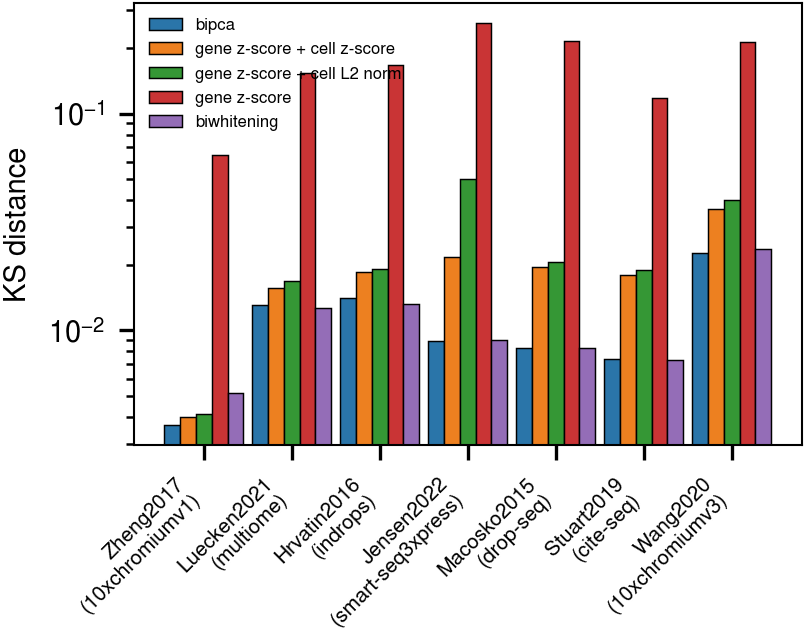

In [6]:
import json
json.dump(scores, open('figures/scalings_counts_%d.json' % ngenes, 'w'))
#scores = json.load(open('figures/scalings_counts.json'))
# Assuming scores is defined
data = scores
categories = list(data.keys())
methods = list(next(iter(data.values())).keys())

values = {method: [data[cat][method][0] for cat in categories] for method in methods}

x = np.arange(len(categories))  # label locations
width = 0.9 / len(methods)      # adaptive width based on number of methods

figsize = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(figsize=[1.2*figsize[0], 0.8*figsize[1]])

cmap = iter(sns.color_palette('tab10', desat=0.85))

for i, method in enumerate(methods):
    offset = (i - (len(methods) - 1) / 2) * width
    bar_positions = x + offset
    ax.bar(bar_positions, values[method], width=width, label=method,
           color=next(cmap), edgecolor='black', linewidth=0.35)

ax.set_ylabel('KS distance')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize = 5)
ax.tick_params(axis='y')

ax.legend(fontsize=4, loc='upper left', frameon=False)

fig.savefig('figures/scalings_counts_%d.pdf' % ngenes, dpi=300)


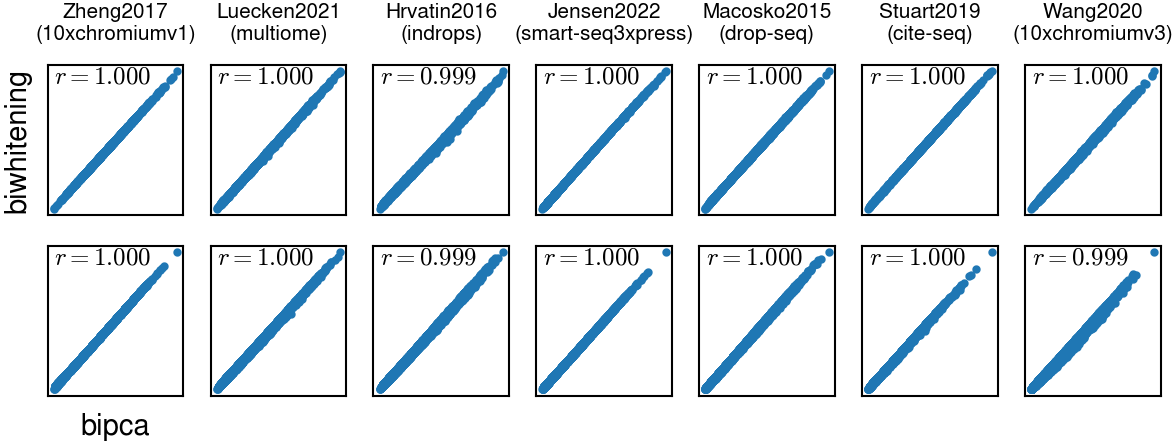

In [7]:
size = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(nrows=2, ncols=len(factors), figsize=(2.0*size[0], 0.6*size[1]))
from scipy.stats import pearsonr

for i, (name, data) in enumerate(factors.items()):

    ax[0,i].scatter(data['bipca'][0], data['biwhitening'][0], s=1**2)
    ax[0,i].collections[0].set_rasterized(True)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    res = pearsonr(data['bipca'][0], data['biwhitening'][0])
    ax[0,i].annotate(r'$r = %.3f$' % res.statistic, (0.05, 0.88), xycoords='axes fraction',fontsize=6)
    ax[0,i].set_title(name, fontsize=5)
    
    
    ax[1,i].scatter(data['bipca'][1], data['biwhitening'][1],s=1**2)
    ax[1,i].collections[0].set_rasterized(True)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    res = pearsonr(data['bipca'][1], data['biwhitening'][1])
    ax[1,i].annotate(r'$r = %.3f$' % res.statistic, (0.05, 0.88), xycoords='axes fraction', fontsize=6)
    
    
ax[0,0].set_ylabel('biwhitening')
ax[1,0].set_xlabel('bipca')

fig.savefig('figures/scalings_pearson_%d.pdf' % ngenes, dpi=300)